In [0]:
!pip install --upgrade tables
!pip install eli5

##Wczytanie bibliotek

In [0]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#modele
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Wczytanie danych

In [1]:
from google.colab import files
uploaded = files.upload()

Saving train.adult.h5 to train.adult.h5


In [0]:
train = pd.read_hdf('train.adult.h5')

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int8
Workclass         30725 non-null object
fnlwgt            32561 non-null int64
Education         32561 non-null object
Education-Num     32561 non-null int64
Martial Status    32561 non-null object
Occupation        30718 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null bool
Capital Gain      32561 non-null int16
Capital Loss      32561 non-null int16
Hours per week    32561 non-null int8
Country           31978 non-null object
Target            32561 non-null object
dtypes: bool(1), int16(2), int64(2), int8(2), object(8)
memory usage: 2.9+ MB


In [20]:
train.describe()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,423.516600,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,3363.342471,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,-31441.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,27828.000000,4356.000000,99.000000


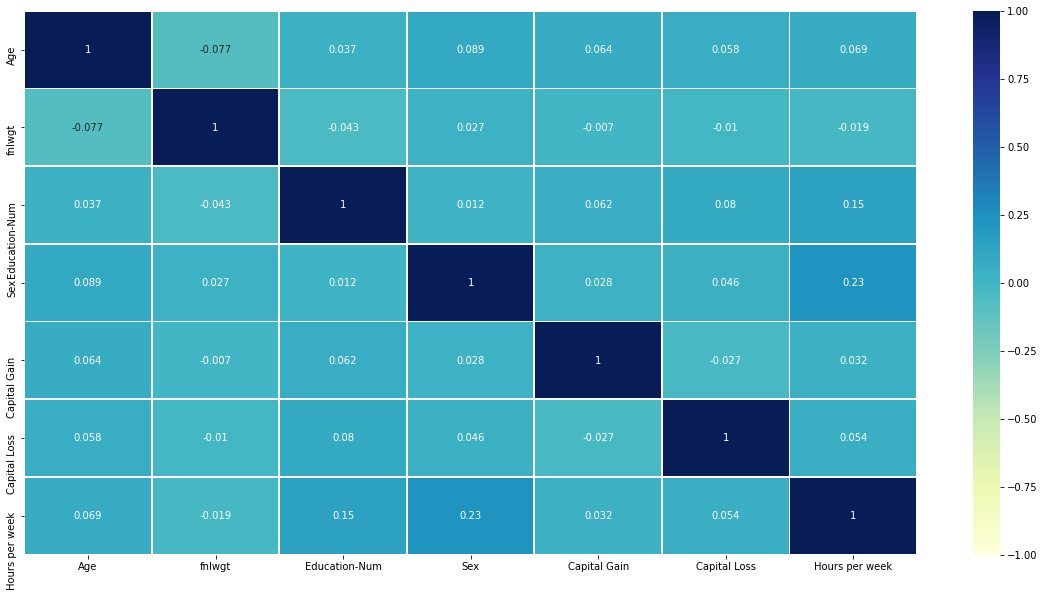

In [18]:
plt.rcParams['figure.figsize']=(20,10)
sns.heatmap(train.corr(), vmax=1., vmin=-1., annot=True, linewidths=.8, cmap="YlGnBu");

##Przegląd danych

In [23]:
train.sample(10)

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
21526,37,Private,236328,10th,6,Married-civ-spouse,Craft-repair,Husband,White,True,0,0,48,United-States,<=50K
26006,27,Private,175821,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,False,0,0,34,United-States,<=50K
29847,49,Private,195612,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,True,7298,0,40,United-States,>50K
8978,60,Private,296485,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,White,True,0,0,40,United-States,<=50K
25432,48,Local-gov,148549,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,True,0,0,40,United-States,<=50K
23231,36,Private,182863,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,True,0,0,50,United-States,>50K
23653,43,Private,142682,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,True,0,0,30,Dominican-Republic,<=50K
9578,21,Private,212407,HS-grad,9,Never-married,Machine-op-inspct,Other-relative,White,True,0,0,40,United-States,<=50K
21566,44,Federal-gov,469454,Assoc-voc,11,Married-civ-spouse,Protective-serv,Husband,White,True,7298,0,48,United-States,>50K
26580,50,Private,171852,Bachelors,13,Separated,Prof-specialty,Own-child,Other,False,0,0,40,United-States,<=50K


### Oficjalny opis danych

- **Age** – Wiek osoby.
- **Workclass** – Rodzaj pracodawcy, jaki ma dana osoba. Niezależnie od tego, czy są to instytucje rządowe, wojskowe, prywatne i inne.
- **fnlwgt** – Pewna liczba (mało istotna jaka). Będziemy ignorować tę zmienną.
- **Education** – Najwyższy poziom wykształcenia osiągnięty dla tej osoby.
- **Education-Num** – Najwyższy poziom wykształcenia w formie liczbowej.
- **Marital** – Stan cywilny osoby.
- **Occupation** – Wykonywany zawód.
- **Relationship** – Trochę trudniejsze do wytłumaczenia. Zawiera wartości związane z rodziną, takie jak mąż, ojciec itd.
- **Race** – opisy poszczególnych ras człowieka. 
- **Sex** – Płeć.
- **Capital Gain** – Zyski kapitałowe rejestrowane.
- **Capital Loss** – Straty kapitałowe rejestrowane.
- **Hours per week** – Liczba godzin przepracowane w tygodniu.
- **Country** – Kraj pochodzenia danej osoby.
- **Target** – Zmienna logiczna (mniejsza, równa się lub większa). Niezależnie od tego, czy dana osoba zarabia więcej niż 50 000$ rocznie.

## Braki w danych

In [24]:
def check_missing():
    for column in train.columns:
        missing = column, train[column].isnull().sum()
        if missing[1] == 0: continue

        print(missing)
        
check_missing()

('Workclass', 1836)
('Occupation', 1843)
('Country', 583)


**Wypełnienie brakujących wartości**

In [0]:
 train = train.fillna(-1)

In [0]:
check_missing()

## Metryka sukcesu


In [0]:
values = [
      #odpowiedź          #predykcja
    ([1, 1, 1, 0, 0, 0], [1, 1, 1, 0, 0, 0]), #dokładność 100% 
    ([1, 1, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0]), #dokładność 50% 
    ([1, 1, 1, 0, 0, 0], [1, 1, 1, 1, 1, 1]), #dokładność 50% 
    ([1, 1, 1, 0, 0, 0], [1, 1, 1, 0, 1, 1]), #dokładność ~67% 
]

In [28]:
for true_values, pred_values in values:
    score = accuracy_score(true_values, pred_values)
    print("score: [{0}], true: {1}, pred: {2}".format(score, true_values, pred_values))

score: [1.0], true: [1, 1, 1, 0, 0, 0], pred: [1, 1, 1, 0, 0, 0]
score: [0.5], true: [1, 1, 1, 0, 0, 0], pred: [0, 0, 0, 0, 0, 0]
score: [0.5], true: [1, 1, 1, 0, 0, 0], pred: [1, 1, 1, 1, 1, 1]
score: [0.6666666666666666], true: [1, 1, 1, 0, 0, 0], pred: [1, 1, 1, 0, 1, 1]


## Basic Model

In [29]:
train['target_cat'] = (train['Target'] != '<=50K').astype('int8')

X = train[ ['Age'] ].values 
y = train[ 'target_cat' ].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (22792, 1) (22792,)
Test: (9769, 1) (9769,)


In [30]:
model = DummyClassifier()

model.fit(X_train, y_train)   
y_pred = model.predict(X_test) 
print(accuracy_score(y_test, y_pred))

0.6323062749513768


/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


**Podręczna funkcja**

In [0]:
def train_and_predict(model, X, y, test_size=0.33):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2018)
    
    model.fit(X_train, y_train)    
    y_pred = model.predict(X_test) 

    return accuracy_score(y_test, y_pred)

In [32]:
train_and_predict(DummyClassifier(), X, y, test_size=0.33)

/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


0.6339441089159586

## Basic Model +

In [33]:
train_and_predict(LogisticRegression(), X, y) #zamiast kropek, trzeba wstawić model np. 

0.745112089261951

## Feature Engineering
Zmienne kategorialne będą zamienione na liczby.


### Label Encoding
Do każdej unikalnej wartości przypisujemy ID
np. `jabłko => 1, gruszka => 2, pomarańcza => 3` itd.

In [34]:
pd.factorize( train['Workclass'] )[0]

array([0, 1, 2, ..., 2, 2, 6])

Zastosowanie `LabelEncoder`

In [36]:
train.Workclass = train.Workclass.map(lambda x: str(x))

le = LabelEncoder()
le.fit(train['Workclass'])
le.transform(train['Workclass'])

array([7, 6, 4, ..., 4, 4, 5])

### One Hot Encoding

In [37]:
train['Race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [38]:
pd.get_dummies( train['Race'] ).head()

,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,1,0,0


### Filtrowanie danych

In [39]:
train.select_dtypes(include=[np.object]).columns

Index(['Workclass', 'Education', 'Martial Status', 'Occupation',
       'Relationship', 'Race', 'Country', 'Target'],
      dtype='object')

In [0]:
cat_feats = train.select_dtypes(include=[np.object]).columns

for cat_feat in cat_feats:
    train['{0}_cat'.format(cat_feat)] = pd.factorize( train[cat_feat] )[0]

###Dodanie cech do modelu

In [41]:
feats = train.select_dtypes(include=[np.int]).columns.values
feats

array(['fnlwgt', 'Education-Num', 'Workclass_cat', 'Education_cat',
       'Martial Status_cat', 'Occupation_cat', 'Relationship_cat',
       'Race_cat', 'Country_cat', 'Target_cat'], dtype=object)

In [42]:
feats = feats[:-1] #-1 oznacza ostatni element, który wycinamy - Target_cat
feats

array(['fnlwgt', 'Education-Num', 'Workclass_cat', 'Education_cat',
       'Martial Status_cat', 'Occupation_cat', 'Relationship_cat',
       'Race_cat', 'Country_cat'], dtype=object)

In [0]:
X = train[ feats ].values
y = train['Target_cat'].values

In [44]:
train_and_predict(LogisticRegression(), X, y, test_size=0.33)

0.7620022520217014